# **STOCK PRICE PREDICTION**

# Data Preprocessing

In [ ]:
# Importing libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt

In [ ]:
# Define the ticker symbol for Amazon and start date and end date
ticker_symbol = 'AMZN'
start_date='2015-01-01'
end_date='2023-05-22'

# Download historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100
2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71472900
2023-05-17,114.889999,115.830002,114.220001,115.500000,115.500000,65655200


In [ ]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
1,2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2,2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
3,2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
4,2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...,...
2105,2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100
2106,2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71472900
2107,2023-05-17,114.889999,115.830002,114.220001,115.500000,115.500000,65655200
2108,2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100


In [ ]:
# Preprocess the data
close_data = data.reset_index()['Close']
open_data = data.reset_index()['Open']
high_data = data.reset_index()['High']
low_data = data.reset_index()['Low']
Date_data = data.reset_index()['Date']

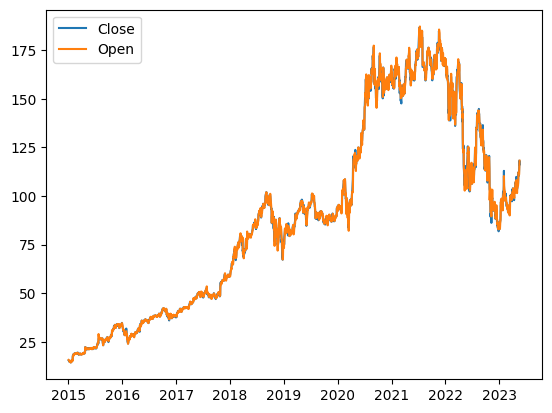

In [ ]:
#plotting open and close data
plt.plot(Date_data,close_data)
plt.plot(Date_data,open_data)
plt.legend(['Close', "Open"])

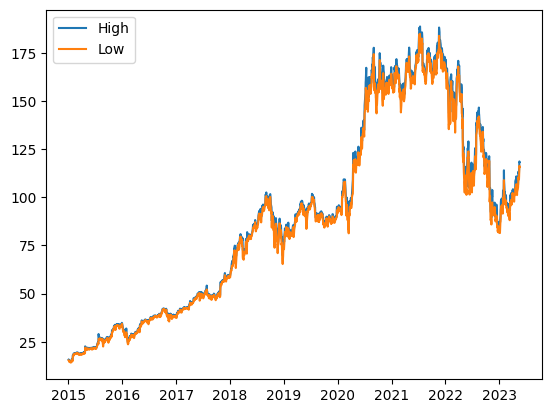

In [ ]:
#plotting high and low data
plt.plot(Date_data,high_data)
plt.plot(Date_data,low_data)
plt.legend(['High', "Low"])

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(np.array(close_data).reshape(-1, 1))
scaled_open = scaler.fit_transform(np.array(open_data).reshape(-1, 1))
scaled_high = scaler.fit_transform(np.array(high_data).reshape(-1, 1))
scaled_low = scaler.fit_transform(np.array(low_data).reshape(-1, 1))

In [ ]:
#Reshaping the Dates_data
Datees= Date_data.to_numpy()
Dates_data = Datees.reshape(2110, 1)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.6)
valid_size = int((len(data)-train_size)*0.5)
test_size = int((len(data)-valid_size-(train_size)))

#train_data
train_date = Dates_data[:train_size]
train_close = scaled_close[:train_size]
train_open = scaled_open[:train_size]
train_high = scaled_high[:train_size]
train_low = scaled_low[:train_size]

#valid_data
valid_date = Dates_data[train_size:train_size+valid_size]
valid_close = scaled_close[train_size:train_size+valid_size]
valid_open = scaled_open[train_size:train_size+valid_size]
valid_high = scaled_high[train_size:train_size+valid_size]
valid_low = scaled_low[train_size:train_size+valid_size]

#test_data
test_date = Dates_data[train_size+valid_size:]
test_close = scaled_close[train_size+valid_size:]
test_open = scaled_open[train_size+valid_size:]
test_high = scaled_high[train_size+valid_size:]
test_low = scaled_low[train_size+valid_size:]

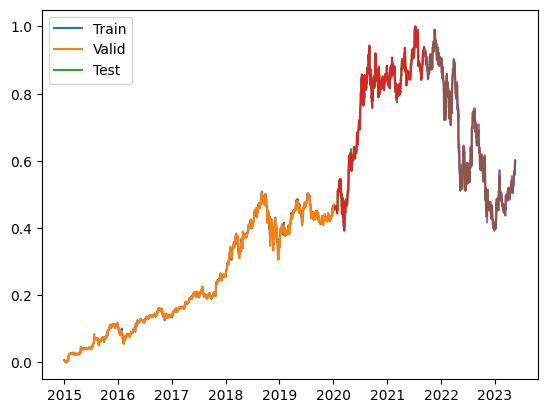

In [ ]:
#Plotting the close and open data
plt.plot(train_date,train_close)
plt.plot(train_date,train_open)
plt.plot(valid_date,valid_close)
plt.plot(valid_date,valid_open)
plt.plot(test_date,test_close)
plt.plot(test_date,test_open)
plt.legend(['Train','Valid','Test'])

In [ ]:
# Convert the data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i+seq_length),0])
        y.append(data[i+seq_length,0])
    return np.array(X), np.array(y)

sequence_length = 100


In [ ]:
# Taking x_trains and y_trains
X_train_close, y_train_close = create_sequences(train_close, sequence_length)
X_train_open, y_train_open = create_sequences(train_open, sequence_length)
X_train_high, y_train_high = create_sequences(train_high, sequence_length)
X_train_low, y_train_low = create_sequences(train_low, sequence_length)

# Taking x_valids and y_valids
X_valid_close, y_valid_close = create_sequences(valid_close, sequence_length)
X_valid_open, y_valid_open = create_sequences(valid_open, sequence_length)
X_valid_high, y_valid_high = create_sequences(valid_high, sequence_length)
X_valid_low, y_valid_low = create_sequences(valid_low, sequence_length)

# Taking x_tests and y_tests
X_test_close, y_test_close = create_sequences(test_close, sequence_length)
X_test_open, y_test_open = create_sequences(test_open, sequence_length)
X_test_high, y_test_high = create_sequences(test_high, sequence_length)
X_test_low, y_test_low = create_sequences(test_low, sequence_length)


In [ ]:
#Reshapping train data
X_train_close = X_train_close.reshape(X_train_close.shape[0], X_train_close.shape[1],1)
X_train_open = X_train_open.reshape(X_train_open.shape[0], X_train_open.shape[1],1)
X_train_high = X_train_high.reshape(X_train_high.shape[0], X_train_high.shape[1],1)
X_train_low = X_train_low.reshape(X_train_low.shape[0], X_train_low.shape[1],1)

#Reshapping valid data
X_valid_close = X_valid_close.reshape(X_valid_close.shape[0], X_valid_close.shape[1],1)
X_valid_open = X_valid_open.reshape(X_valid_open.shape[0], X_valid_open.shape[1],1)
X_valid_high = X_valid_high.reshape(X_valid_high.shape[0], X_valid_high.shape[1],1)
X_valid_low = X_valid_low.reshape(X_valid_low.shape[0], X_valid_low.shape[1],1)

#Reshapping test data
X_test_close = X_test_close.reshape(X_test_close.shape[0], X_test_close.shape[1],1)
X_test_open = X_test_open.reshape(X_test_open.shape[0], X_test_open.shape[1],1)
X_test_high = X_test_high.reshape(X_test_high.shape[0], X_test_high.shape[1],1)
X_test_low = X_test_low.reshape(X_test_low.shape[0], X_test_low.shape[1],1)

# Using LSTM Model To get Predictions

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
# Train the model
model.fit(X_train_close, y_train_close, validation_data=(X_valid_close,y_valid_close), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
37/37 [==============================] - 18s 295ms/step - loss: 0.0066 - val_loss: 0.0076
Epoch 2/50
37/37 [==============================] - 9s 237ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 3/50
37/37 [==============================] - 9s 235ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 4/50
37/37 [==============================] - 8s 203ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 5/50
37/37 [==============================] - 9s 239ms/step - loss: 0.0012 - val_loss: 0.0144
Epoch 6/50
37/37 [==============================] - 9s 234ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 7/50
37/37 [==============================] - 8s 205ms/step - loss: 9.8264e-04 - val_loss: 0.0093
Epoch 8/50
37/37 [==============================] - 9s 238ms/step - loss: 8.8693e-04 - val_loss: 0.0051
Epoch 9/50
37/37 [==============================] - 8s 216ms/step - loss: 9.1035e-04 - val_loss: 0.0078
Epoch 10/50
37/37 [==============================] - 8s 222ms/step - loss: 8.6771e-04 -

In [ ]:
  # Evaluate the model
train_predictions_close = model.predict(X_train_close)
valid_predictions_close = model.predict(X_valid_close)
test_predictions_close = model.predict(X_test_close)

11/11 [==============================] - 1s 52ms/step


In [ ]:
# Inverse scale the predictions
train_predictions_close = scaler.inverse_transform(train_predictions_close)
valid_predictions_close=scaler.inverse_transform(valid_predictions_close)
test_predictions_close = scaler.inverse_transform(test_predictions_close)

37/37 [==============================] - 4s 101ms/step


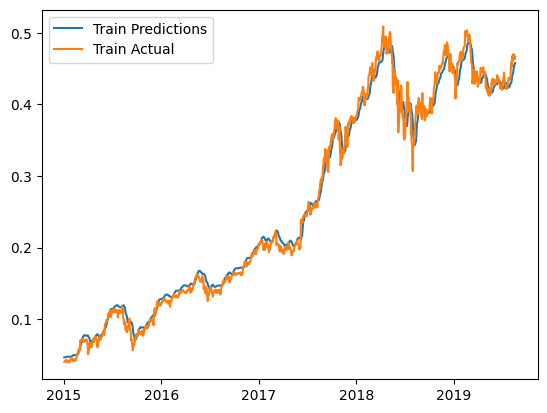

In [ ]:
# Plotting actual and predicted values on train set
train_predictions_close1=model.predict(X_train_close).flatten()

plt.plot(Dates_data[:train_size-100],train_predictions_close1)
plt.plot(Dates_data[:train_size-100],y_train_close)
plt.legend(['Train Predictions','Train Actual'])

11/11 [==============================] - 1s 52ms/step


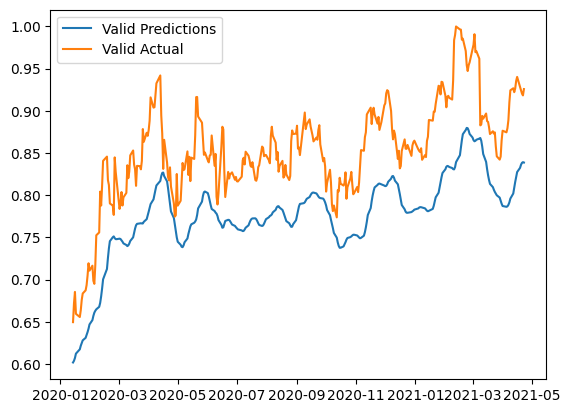

In [ ]:
# Plotting actual and predicted values on valid set
valid_predictions_close1=model.predict(X_valid_close).flatten()

plt.plot(Dates_data[train_size:train_size+valid_size-100],valid_predictions_close1)
plt.plot(Dates_data[train_size:train_size+valid_size-100],y_valid_close)
plt.legend(['Valid Predictions','Valid Actual'])

11/11 [==============================] - 1s 52ms/step


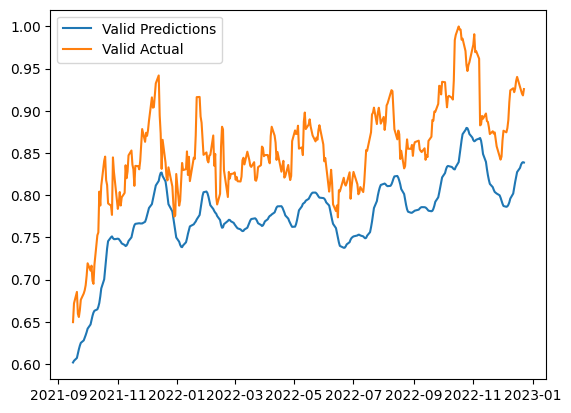

In [ ]:
# Plotting actual and predicted values on Test set
test_predictions_close1=model.predict(X_valid_close).flatten()

plt.plot(Dates_data[train_size+valid_size:len(data)-100],test_predictions_close1)
plt.plot(Dates_data[train_size+valid_size:len(data)-100],y_valid_close)
plt.legend(['Valid Predictions','Valid Actual'])

In [ ]:
Ref=[]
for i in range(len(data)-101-(train_size+valid_size)):
  Ref.append(0)

In [ ]:
y_test_close=scaler.inverse_transform(y_test_close.reshape(len(y_test_close),1))

In [ ]:
y_test_close=y_test_close.flatten()
test_predictions_close=test_predictions_close.flatten()
y_test_close=y_test_close.tolist()
test_predictions_close=test_predictions_close.tolist()

In [ ]:
profit=[]
for i in range(len(test_predictions_close)-1):
  k = ((test_predictions_close[1+i]-y_test_close[i])*(y_test_close[i+1]-y_test_close[i]))/y_test_close[i]
  if(k>0):
    print("Buy and Profit is ", y_test_close[i]-y_test_open[i])
    profit.append(y_test_close[i]-y_test_open[i])
  else:
    print("Sell and Loss is ", -y_test_close[i]+y_test_open[i])
    profit.append(-y_test_close[i]+y_test_open[i])

Buy and Profit is  159.0990551130637
Buy and Profit is  158.84178052764895
Buy and Profit is  156.70283302562632
Sell and Loss is  -151.0486606855459
Sell and Loss is  -152.94118267556505
Sell and Loss is  -154.23796969867192
Buy and Profit is  155.82326807918878
Buy and Profit is  152.39459932201578
Buy and Profit is  150.3785143852329
Buy and Profit is  148.02652570231717
Sell and Loss is  -142.70057599196295
Sell and Loss is  -149.23749074915185
Buy and Profit is  151.58279490825754
Buy and Profit is  151.3486103647352
Sell and Loss is  -148.9489650126606
Buy and Profit is  149.86166459760094
Buy and Profit is  145.73184313776562
Buy and Profit is  143.53278634571416
Sell and Loss is  -135.43296149249025
Buy and Profit is  134.0588719854827
Sell and Loss is  -137.27589181029433
Buy and Profit is  144.70656634559245
Buy and Profit is  143.4034273192293
Sell and Loss is  -139.7877938997979
Sell and Loss is  -145.2667133870758
Sell and Loss is  -150.91670041018963
Sell and Loss is  -15

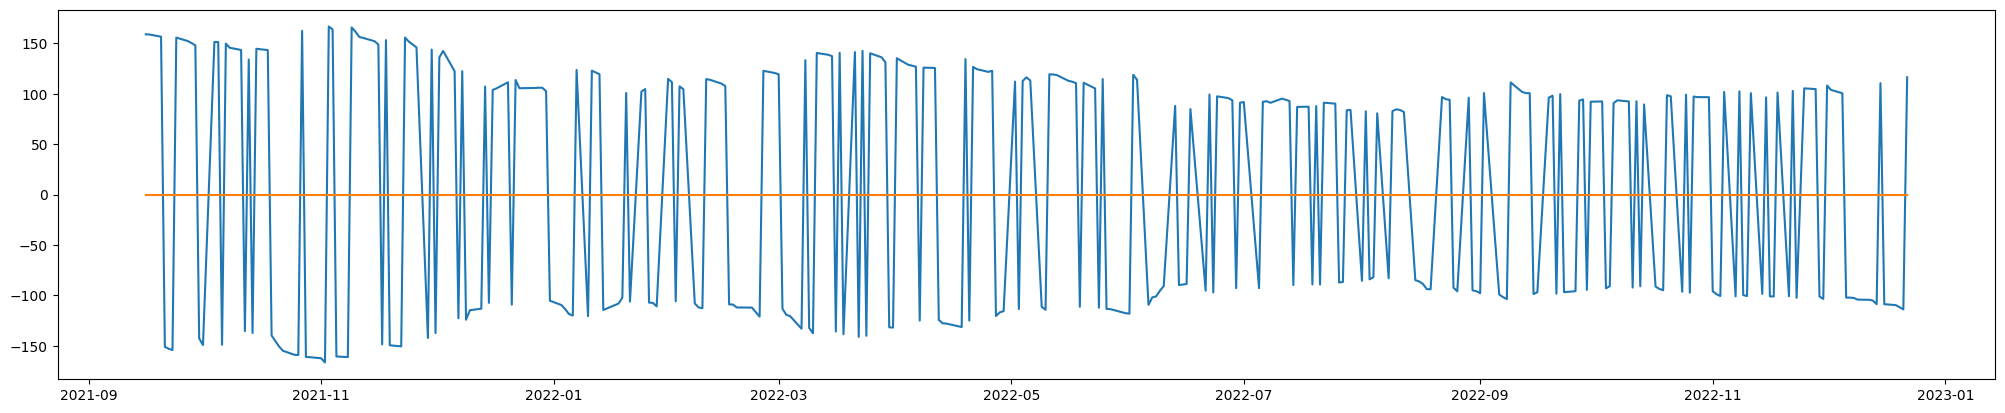

In [ ]:
fig = plt.figure()
fig.set_figwidth(25)
plt.plot(Dates_data[train_size+valid_size:len(data)-101],profit)
plt.plot(Dates_data[train_size+valid_size:len(data)-101],Ref)

In [ ]:
cummulative_profit=[]
sum=0
for i in range(len(test_predictions_close)-1):
  cummulative_profit.append(profit[i]+sum)
  sum=cummulative_profit[i]
  print("Cummulative Profit on day ",i+1," is ",sum)

Cummulative Profit on day  1  is  159.0990551130637
Cummulative Profit on day  2  is  317.94083564071263
Cummulative Profit on day  3  is  474.64366866633895
Cummulative Profit on day  4  is  323.59500798079307
Cummulative Profit on day  5  is  170.65382530522803
Cummulative Profit on day  6  is  16.415855606556107
Cummulative Profit on day  7  is  172.2391236857449
Cummulative Profit on day  8  is  324.63372300776064
Cummulative Profit on day  9  is  475.01223739299354
Cummulative Profit on day  10  is  623.0387630953107
Cummulative Profit on day  11  is  480.33818710334776
Cummulative Profit on day  12  is  331.1006963541959
Cummulative Profit on day  13  is  482.68349126245346
Cummulative Profit on day  14  is  634.0321016271887
Cummulative Profit on day  15  is  485.0831366145281
Cummulative Profit on day  16  is  634.944801212129
Cummulative Profit on day  17  is  780.6766443498947
Cummulative Profit on day  18  is  924.2094306956088
Cummulative Profit on day  19  is  788.77646920

Text(0.5, 1.0, 'Cummulative Profit')

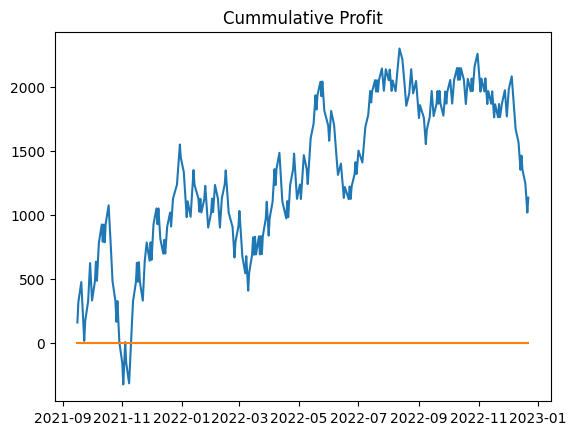

In [ ]:
plt.plot(Dates_data[train_size+valid_size:len(data)-101],cummulative_profit)
plt.plot(Dates_data[train_size+valid_size:len(data)-101],Ref)
plt.title("Cummulative Profit")

# Using FB Prophet Model to get Predictions

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
model_1=Prophet()

In [ ]:
# Prepare the data
df = data[['Date', 'Close']]
df_open = data[['Open']]
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)


In [ ]:
# Create and train the Prophet model
model_1 = Prophet()
model_1.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjjzjkv4y/nvhlkbft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjjzjkv4y/wbxujvda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22754', 'data', 'file=/tmp/tmpjjzjkv4y/nvhlkbft.json', 'init=/tmp/tmpjjzjkv4y/wbxujvda.json', 'output', 'file=/tmp/tmpjjzjkv4y/prophet_modelum75xjc7/prophet_model-20230603105447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions
test_size=len(test_data)
future = model_1.make_future_dataframe(periods=test_size)
forecast = model_1.predict(future)

In [ ]:
# Extract forecasted values for the test data
forecast_test = forecast[-len(test_data):][['ds', 'yhat']]
# Extract the predicted values for the test data
y_test_predicted_fb = forecast_test['yhat'].values

In [ ]:
# Extract the actual values for the test data
y_test_actual = test_data['y'].values

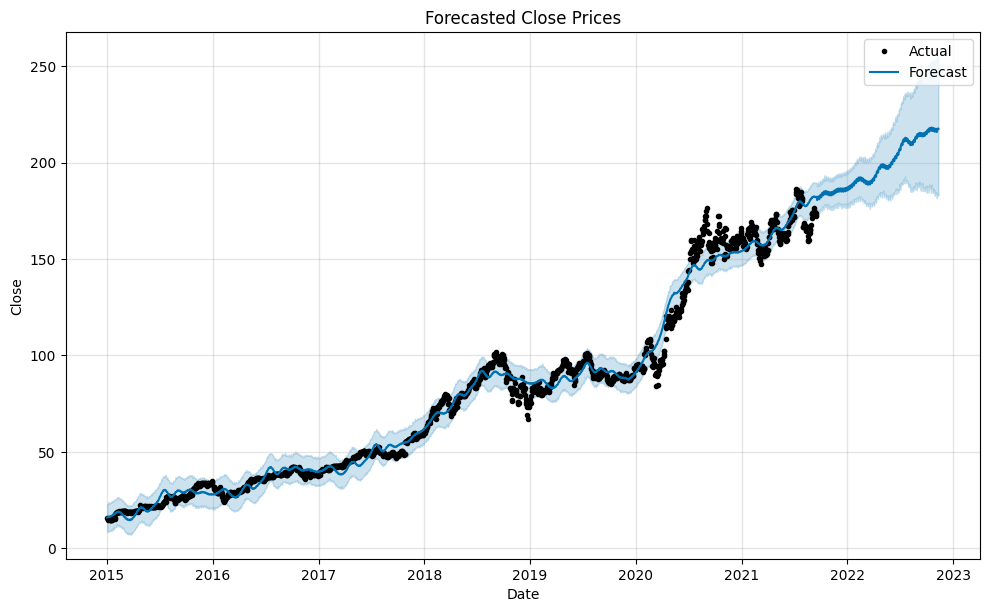

In [ ]:
# Plot the forecasted values
model_1.plot(forecast, xlabel='Date', ylabel='Close')
plt.title('Forecasted Close Prices')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
y_open = df_open['Open'].values
train_data_open, test_data_open = train_test_split(y_open, test_size=0.2, shuffle=False)

In [ ]:
profit_1=[]
for i in range(len(y_test_predicted_fb)-1):
  k = ((y_test_predicted_fb[1+i]-y_test_actual[i])*(y_test_actual[i+1]-y_test_actual[i]))/y_test_actual[i]
  if(k>0):
    print("Buy and Profit is ", y_test_actual[i]-test_data_open[i])
    profit_1.append(y_test_actual[i]-test_data_open[i])
  else:
    print("Sell and Loss is ", -y_test_actual[i]+test_data_open[i])
    profit_1.append(-y_test_actual[i]+test_data_open[i])

Sell and Loss is  -1.41400146484375
Sell and Loss is  1.29449462890625
Sell and Loss is  2.0135040283203125
Buy and Profit is  -1.5684967041015625
Buy and Profit is  1.4524993896484375
Buy and Profit is  1.7975006103515625
Sell and Loss is  -1.175506591796875
Sell and Loss is  -1.714996337890625
Sell and Loss is  2.087493896484375
Sell and Loss is  1.04949951171875
Sell and Loss is  1.548004150390625
Sell and Loss is  0.287506103515625
Buy and Profit is  -4.480499267578125
Buy and Profit is  0.8249969482421875
Buy and Profit is  2.4239959716796875
Sell and Loss is  -0.5445098876953125
Sell and Loss is  1.41900634765625
Buy and Profit is  -1.43499755859375
Buy and Profit is  -0.4835052490234375
Buy and Profit is  0.7285003662109375
Buy and Profit is  -0.1295013427734375
Buy and Profit is  4.8800048828125
Sell and Loss is  -2.91900634765625
Sell and Loss is  -0.493011474609375
Buy and Profit is  -1.8799896240234375
Sell and Loss is  -1.0380096435546875
Sell and Loss is  4.272506713867187

In [ ]:
Ref_1=[]
for i in range(len(profit_1)):
  Ref_1.append(0)

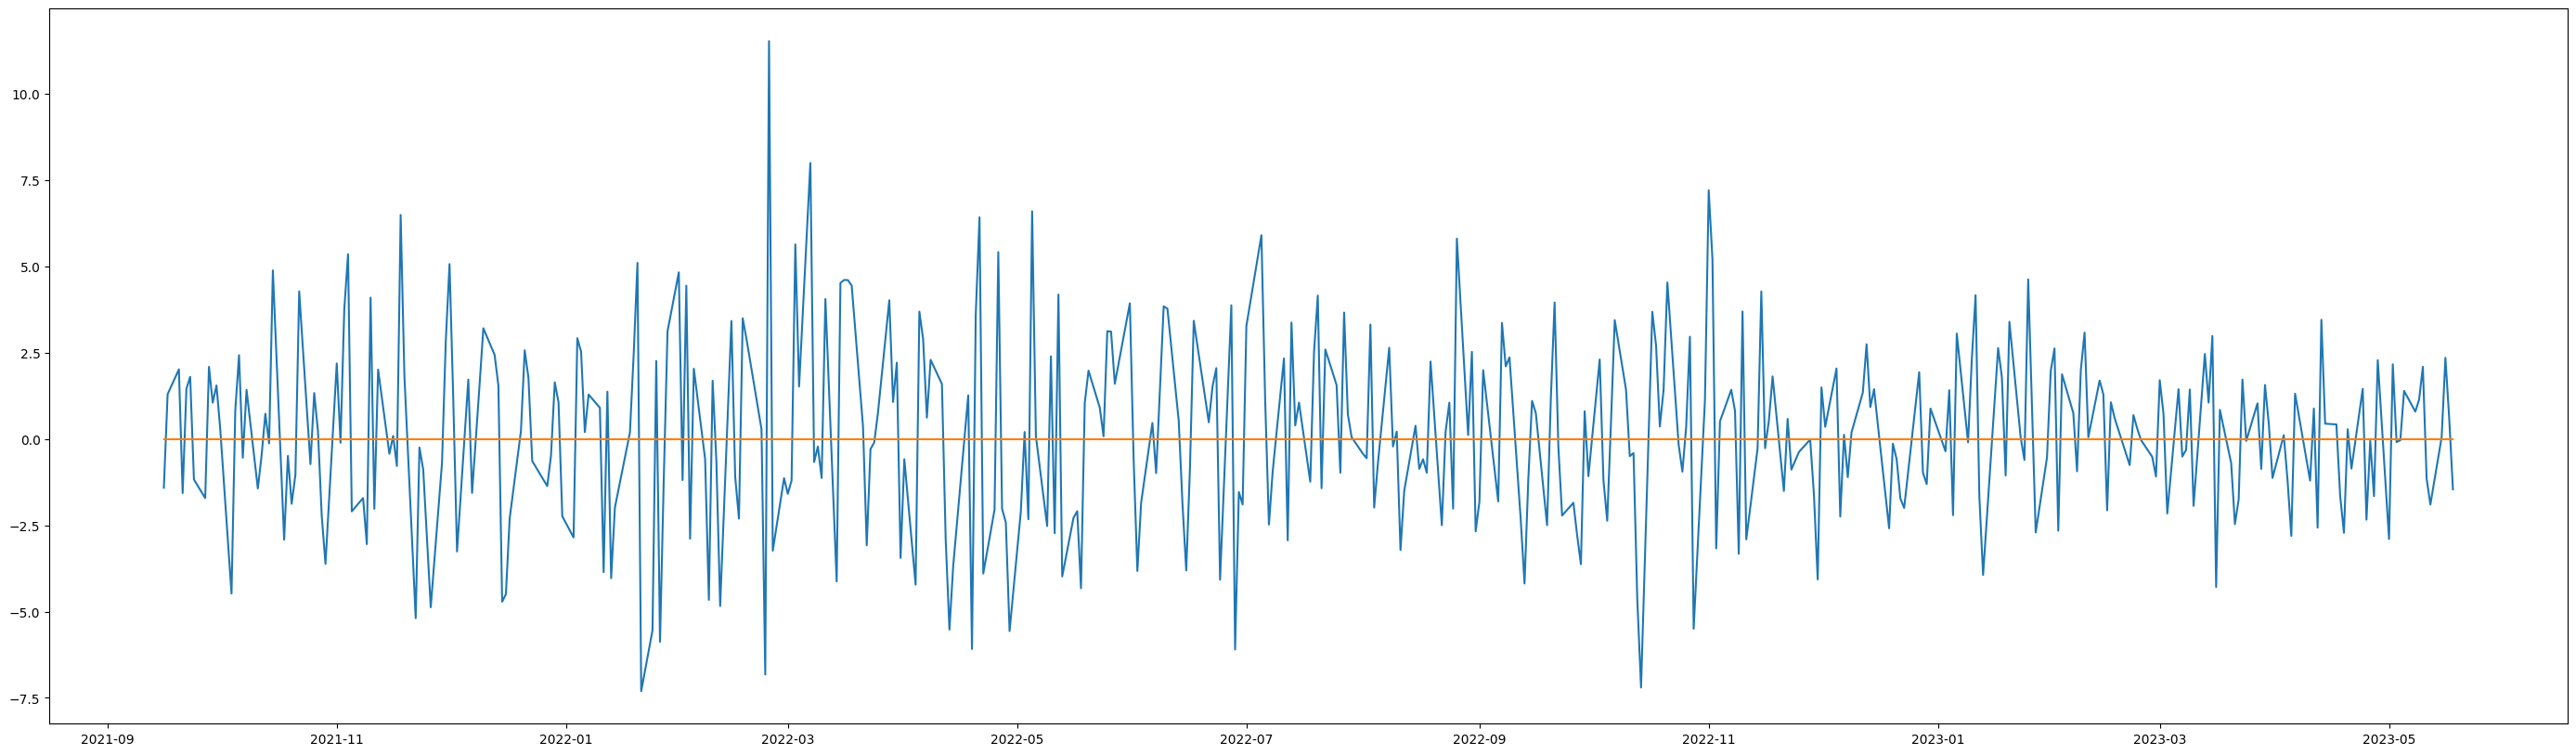

In [ ]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(10)
plt.plot(Dates_data[train_size+valid_size:len(data)-1],profit_1)
plt.plot(Dates_data[train_size+valid_size:len(data)-1],Ref_1)

In [ ]:
cummulative_profit_1=[]
Sum=0
for i in range(len(test_predictions_close)+99):
  cummulative_profit_1.append(profit_1[i]+Sum)
  Sum=cummulative_profit_1[i]
  print("Cummulative Profit on day ",i+1," is ",Sum)

Cummulative Profit on day  1  is  -1.41400146484375
Cummulative Profit on day  2  is  -0.1195068359375
Cummulative Profit on day  3  is  1.8939971923828125
Cummulative Profit on day  4  is  0.32550048828125
Cummulative Profit on day  5  is  1.7779998779296875
Cummulative Profit on day  6  is  3.57550048828125
Cummulative Profit on day  7  is  2.399993896484375
Cummulative Profit on day  8  is  0.68499755859375
Cummulative Profit on day  9  is  2.772491455078125
Cummulative Profit on day  10  is  3.821990966796875
Cummulative Profit on day  11  is  5.3699951171875
Cummulative Profit on day  12  is  5.657501220703125
Cummulative Profit on day  13  is  1.177001953125
Cummulative Profit on day  14  is  2.0019989013671875
Cummulative Profit on day  15  is  4.425994873046875
Cummulative Profit on day  16  is  3.8814849853515625
Cummulative Profit on day  17  is  5.3004913330078125
Cummulative Profit on day  18  is  3.8654937744140625
Cummulative Profit on day  19  is  3.381988525390625
Cummu

Text(0.5, 1.0, 'Cummulative Profit Chart')

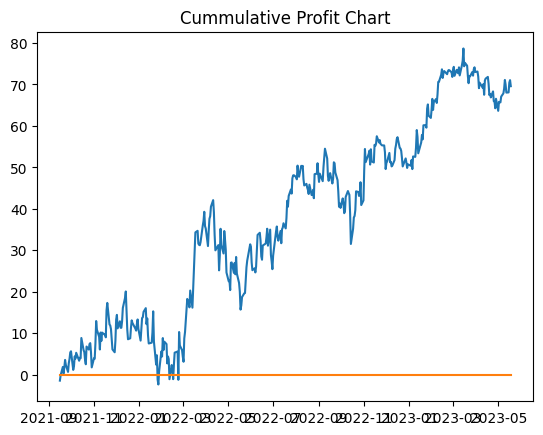

In [ ]:
plt.plot(Dates_data[train_size+valid_size:len(data)-1],cummulative_profit_1)
plt.plot(Dates_data[train_size+valid_size:len(data)-1],Ref_1)
plt.title("Cummulative Profit Chart")